In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
#đọc dữ liệu từ file csv
dt=pd.read_csv("airline.csv", encoding="ISO-8859-1")
dt.dropna()
dt.drop_duplicates()
dt

Airline DestinationCountry
0                   Air France      United States
1                   Air France      Cote d'Ivoire
2                   Air France      United States
3                   Air France            Nigeria
4                   Air France            Nigeria
...                        ...                ...
6135  Virgin Atlantic Airlines      United States
6136  Virgin Atlantic Airlines        Saint Lucia
6137  Virgin Atlantic Airlines        Saint Lucia
6138  Virgin Atlantic Airlines        Saint Lucia
6139  Virgin Atlantic Airlines             Russia

[6140 rows x 2 columns]

In [ ]:
B = nx.Graph()
Airline = dt['Airline']
DestinationCountry = dt['DestinationCountry']
print('So Airline', Airline.nunique())
print('So DestinationCountry', DestinationCountry.nunique())
print('So canh', len(dt))

So Airline 15
So DestinationCountry 185
So canh 6140


In [ ]:
for index, row in dt.iterrows():
    B.add_edge(row['Airline'], row['DestinationCountry'], weight=1)
B.add_nodes_from(DestinationCountry,bipartite=0)
B.add_nodes_from(Airline,bipartite=1)

<Figure size 1200x1200 with 0 Axes>

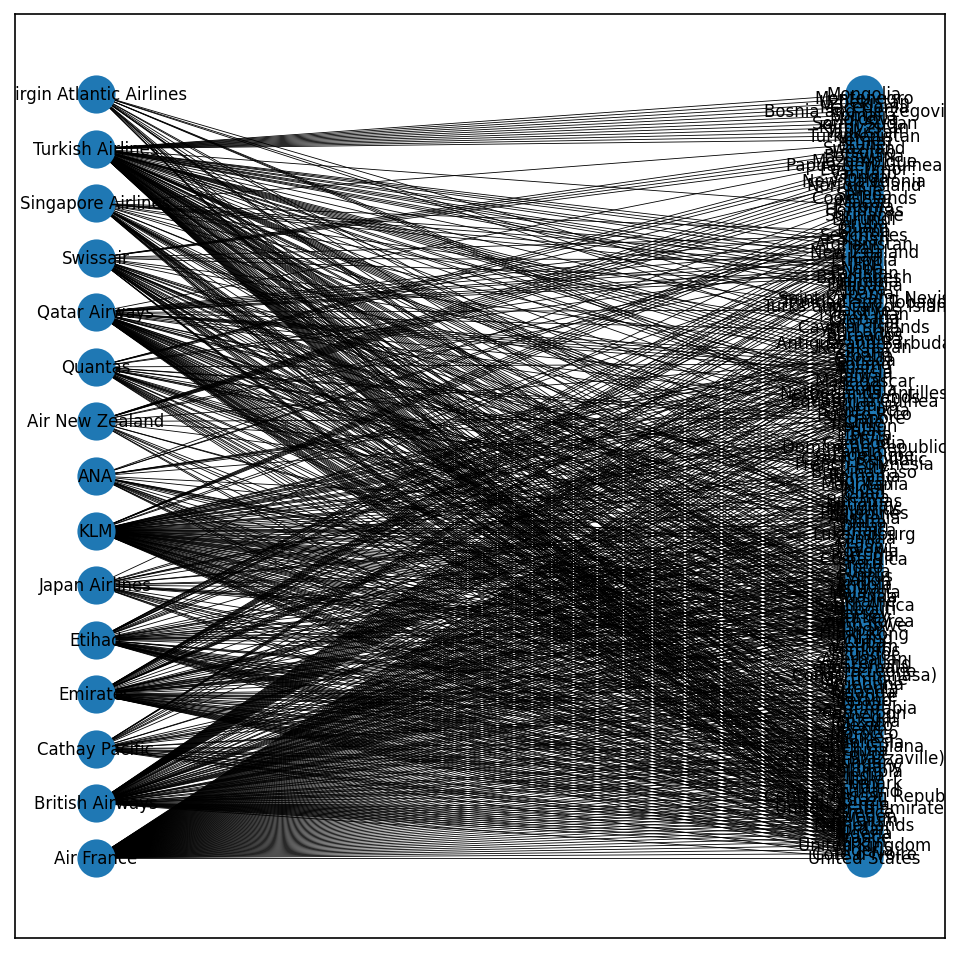

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Airline),font_size=8,width=0.4)

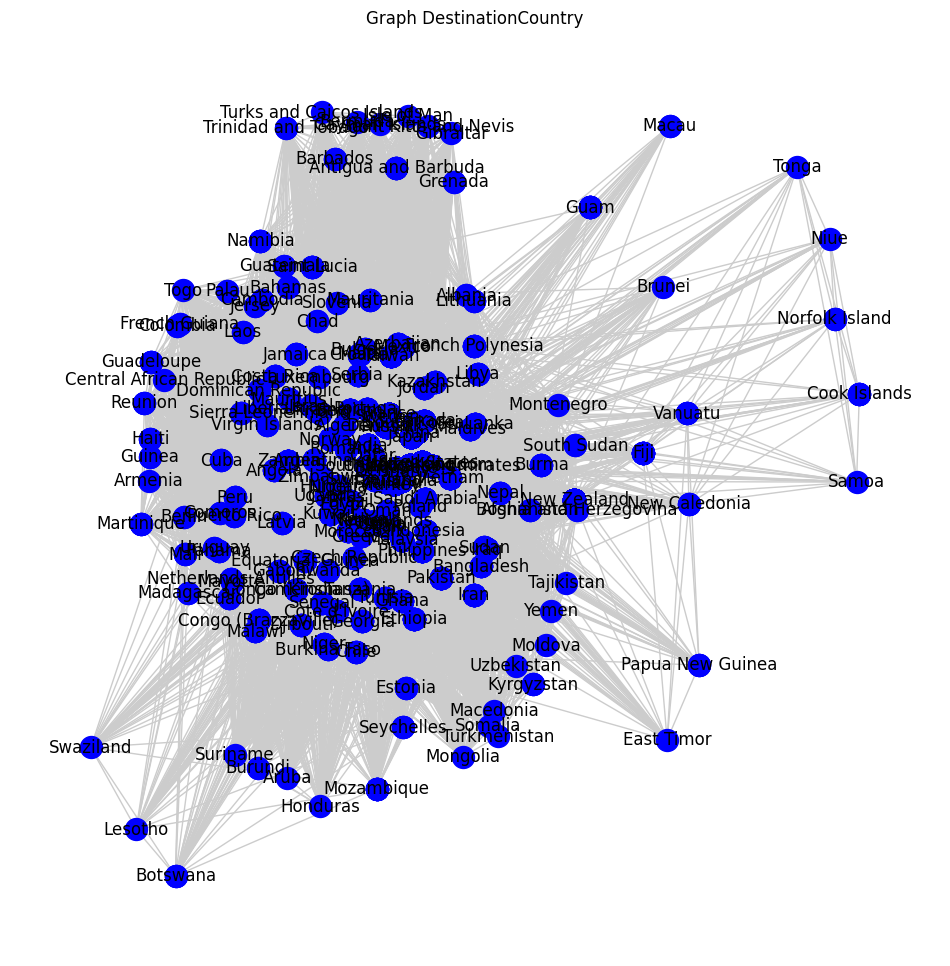

In [ ]:
G = bipartite.weighted_projected_graph(B,list(set(DestinationCountry)))
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=DestinationCountry,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(DestinationCountry, DestinationCountry))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph DestinationCountry")

plt.show()

In [ ]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df2.to_csv (r'gelphi.csv', index = False, header=True)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<ipython-input-9-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
<ipython-input-9-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
<ipython-input-9-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
<ipython-input-9-19db72e5b984>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2

In [ ]:
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

source            target
0              Yemen          Portugal
1              Yemen          Malaysia
2              Yemen            Poland
3              Yemen           Senegal
4              Yemen            Norway
...              ...               ...
12255  Cote d'Ivoire        Kyrgyzstan
12256          Spain        Kazakhstan
12257          Spain  French Polynesia
12258          Spain        Kyrgyzstan
12259     Kazakhstan        Kyrgyzstan

[12260 rows x 2 columns]

In [ ]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 185
Số cạnh của đồ thị là 12260


In [ ]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


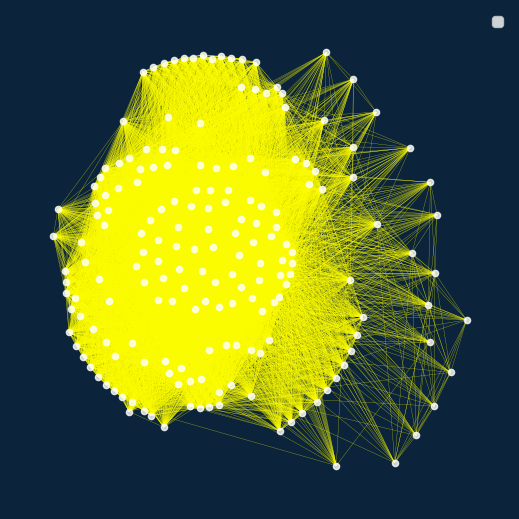

In [ ]:
# %load_ext autotime
# nx.draw_networkx(G)

pd.set_option('display.precision', 10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)

cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

# GEOMETRIC MEASURES

In [ ]:
nx.average_shortest_path_length(G)

1.2796709753231492

Degree Centrality
Denition:
Number of Neighbors I Have / Number of Neighbors I Could Possibly Have

In [ ]:
# average degree

average_degree = sum([len(list(G.neighbors(n))) for n in G.nodes()]) / len(G.nodes())

print('Average degree: ', average_degree)

Average degree:  132.54054054054055


In [ ]:
#degree of each node
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

Node  Degree
0               Yemen     104
1            Portugal     169
2            Malaysia     164
3              Poland     175
4             Senegal     156
..                ...     ...
180          Botswana      40
181        Mozambique      86
182            Brunei      37
183  Papua New Guinea      34
184        East Timor      34

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị bậc của các node trong graph


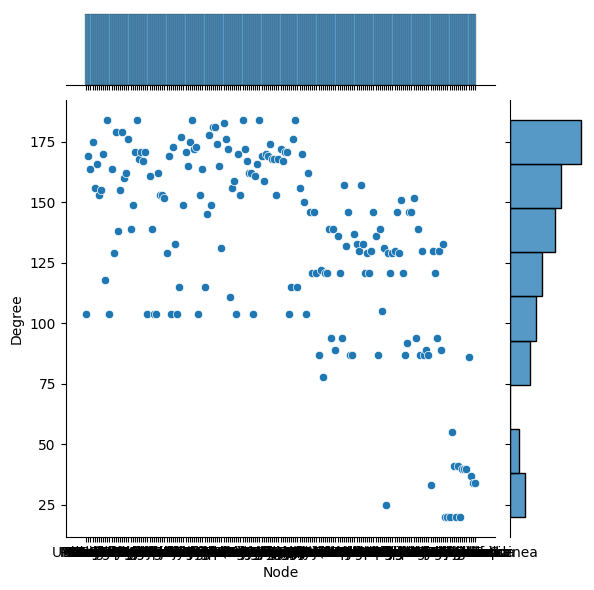

In [ ]:
print(colored("Biểu đồ thể hiện giá trị bậc của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Degree", data=degree_df)

Biểu đồ thể hiện phân bố bậc của các node trong graph


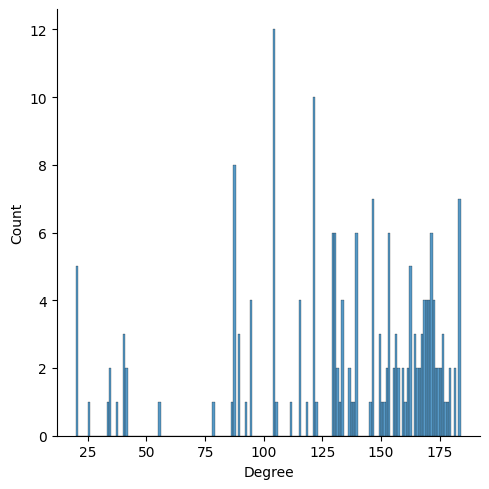

In [ ]:
print(colored("Biểu đồ thể hiện phân bố bậc của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Degree", data=degree_df, binwidth=1)

In [ ]:
sorted_degree_dict = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)
top_10_max_degree = list(sorted_degree_dict)[:10]

print('Top 10 node có bậc cao nhất : ')
print_table(top_10_max_degree, ['Node', 'Degree'])

Top 10 node có bậc cao nhất : 


Node  Degree
0        United Kingdom     184
1         United States     184
2  United Arab Emirates     184
3               Germany     184
4             Hong Kong     184
5             Singapore     184
6             Australia     183
7                 China     181
8                 Japan     181
9           Switzerland     179

In [ ]:
sorted_degree_dict = sorted(degree_dict.items(), key=lambda item: item[1], reverse=False)
top_10_min_degree = list(sorted_degree_dict)[:10]

print('Top 10 node có bậc thấp nhất : ')
print_table(top_10_min_degree, ['Node', 'Degree'])

Top 10 node có bậc thấp nhất : 


Node  Degree
0    Norfolk Island      20
1             Samoa      20
2             Tonga      20
3              Niue      20
4      Cook Islands      20
5             Macau      25
6              Guam      33
7  Papua New Guinea      34
8        East Timor      34
9            Brunei      37

In [ ]:
# degree centrality

deg_cen = nx.degree_centrality(G) # return a dictionary
sorted_deg_cen = sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)
deg_cen_df = print_table(sorted_deg_cen, ['DestinationCountry', 'Degree centrality'])
deg_cen_df

DestinationCountry  Degree centrality
0          United Kingdom       1.0000000000
1           United States       1.0000000000
2    United Arab Emirates       1.0000000000
3                 Germany       1.0000000000
4               Hong Kong       1.0000000000
..                    ...                ...
180        Norfolk Island       0.1086956522
181                 Samoa       0.1086956522
182                 Tonga       0.1086956522
183                  Niue       0.1086956522
184          Cook Islands       0.1086956522

[185 rows x 2 columns]

In [ ]:
print('Top 5 quốc gia có Degree centrality cao nhất: ')
print_table(sorted_deg_cen[:5], ['DestinationCountry', 'Degree centrality'])

Top 5 quốc gia có Degree centrality cao nhất: 


DestinationCountry  Degree centrality
0        United Kingdom                1.0
1         United States                1.0
2  United Arab Emirates                1.0
3               Germany                1.0
4             Hong Kong                1.0

In [ ]:
print('Top 5 Quốc gia có Degree centrality thấp nhất: ')
print_table(sorted_deg_cen[-5:],  ['DestinationCountry', 'Degree centrality'])

Top 5 Quốc gia có Degree centrality thấp nhất: 


DestinationCountry  Degree centrality
0     Norfolk Island       0.1086956522
1              Samoa       0.1086956522
2              Tonga       0.1086956522
3               Niue       0.1086956522
4       Cook Islands       0.1086956522

#### Louvain

<ipython-input-25-b446c7c92209>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values())+1)


<Figure size 1700x1200 with 0 Axes>

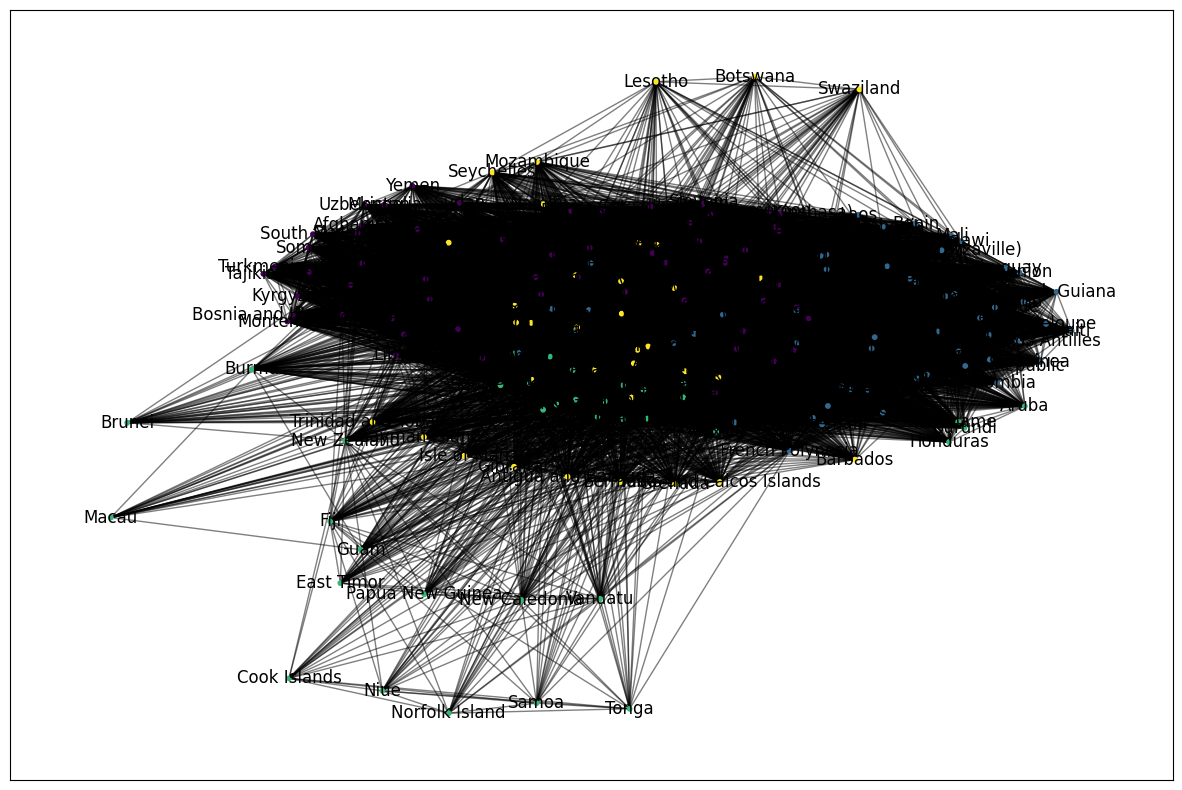

In [ ]:
plt.figure(figsize=(17,12))

#compute the best partition
partition = community_louvain.best_partition(G)

#draw the graph
pos = nx.spring_layout(G)

#color the nodes according to their partition
fig = plt.figure(figsize = (15,10), dpi=100)

cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
clusters = set([cluster for _, cluster in partition.items()])
print('Số cụm trong graph là: ', len(clusters))

Số cụm trong graph là:  4


Cụm 0 #440154


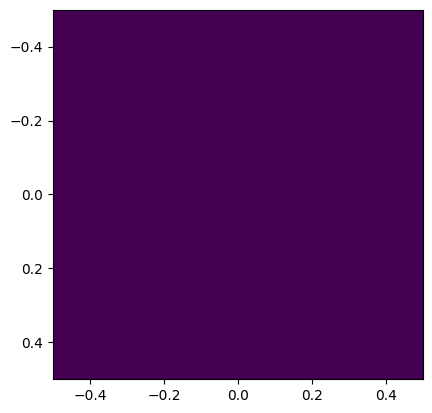

--------------------------------------
Cụm 1 #31688e


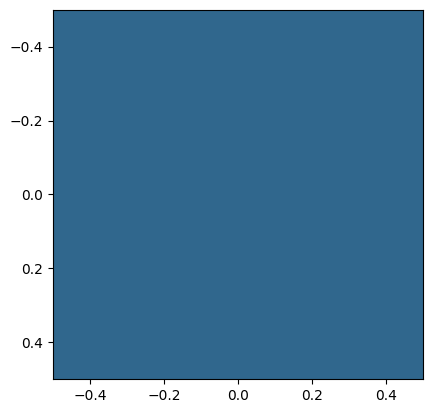

--------------------------------------
Cụm 2 #35b779


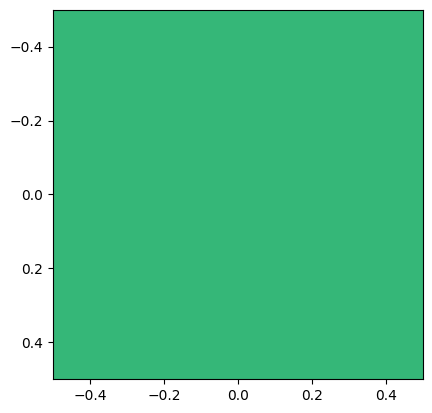

--------------------------------------
Cụm 3 #fde725


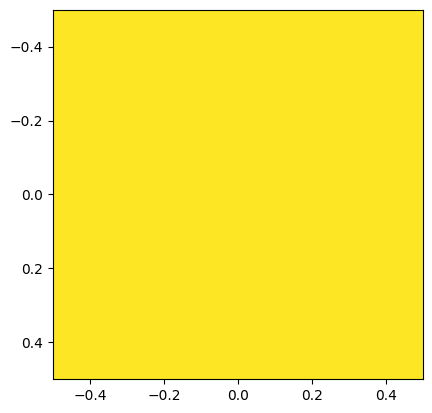

--------------------------------------


In [ ]:
for i in set(partition.values()):
    rgba = cmap(i)
    print('Cụm' ,i, matplotlib.colors.rgb2hex(rgba))
    plt.imshow([[cmap(i)]])
    plt.show()
    print('--------------------------------------')

In [ ]:
for i in range(len(clusters)):
    print("nhom",i,"***************")
    for name,k in partition.items():
        if k==i:
            print(name)
    print("")

nhom 0 ***************
Yemen
Malaysia
Senegal
Norway
Tunisia
Gabon
Bangladesh
Macedonia
Israel
Lithuania
Pakistan
Georgia
Rwanda
Malta
Sri Lanka
Slovenia
Bosnia and Herzegovina
Tanzania
Maldives
Moldova
Mongolia
Azerbaijan
Burkina Faso
Equatorial Guinea
Serbia
Albania
Uzbekistan
Libya
Tajikistan
Iraq
Mauritania
Finland
Somalia
Niger
Luxembourg
Nepal
Ethiopia
Chad
Estonia
Afghanistan
Ghana
Congo (Kinshasa)
Montenegro
Latvia
Romania
Croatia
Bulgaria
Turkmenistan
Vietnam
Ukraine
Cameroon
Argentina
Morocco
Djibouti
Hungary
South Sudan
Iran
Sudan
Cote d'Ivoire
Kazakhstan
Kyrgyzstan

nhom 1 ***************
Portugal
Cyprus
Belgium
Jordan
Greece
Austria
Netherlands
Algeria
Spain
Sierra Leone
Reunion
Liberia
Colombia
Palau
Martinique
Guinea
Bahamas
Jersey
Congo (Brazzaville)
Guadeloupe
Zambia
Laos
Dominican Republic
Chile
Cuba
Panama
Angola
Puerto Rico
French Guiana
Cambodia
Armenia
Comoros
Jamaica
Malawi
Saint Lucia
Peru
Mali
Haiti
Benin
Netherlands Antilles
Taiwan
Madagascar
Philippines
Centr

In [ ]:
print('Bảng chi tiết cluster trong graph: ')
cluster_df = print_table(partition.items(), ['Node', 'Cluster'])
cluster_df

Bảng chi tiết cluster trong graph: 


Node  Cluster
0               Yemen        0
1            Portugal        1
2            Malaysia        0
3              Poland        2
4             Senegal        0
..                ...      ...
180          Botswana        3
181        Mozambique        3
182            Brunei        2
183  Papua New Guinea        2
184        East Timor        2

[185 rows x 2 columns]

In [ ]:
cluster_df.to_csv("louvain.csv")